# Programmieraufgabe V ( 8 + 8 + 8 = 24 Punkte) 
## Abgabe in der Woche 14.-18. Januar 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

## Teilaufgabe a) 

Implementieren Sie die _$N$-fach summierte Newton-Cotes-Quadratur_ vom Grad $m = 1$ und $m = 3$ bzw. die $N$-fach summierte _Gauss-Legendre-Quadratur_ für $m=2$ bzw. $m=4$ (siehe Vorlesung) auf einem Interval $[a,b]$. 

Input sollen jeweils die zu integrierende Funktion $f$, die Intervallgrenzen $a,b$ und die Anzahl der Teilintervalle $N$ sein.

In [32]:
def f(x):
    if(x>0.5):return 1
    return 0
def New_Cot_xi(a,b,N,m):
    lin = np.linspace(a,b,N*m+1)
    return lin
def New_Cot_wi(a,b,N,m):
    base =[]
    tmp = 0
    if(m==1):
        base = [(1/2),(1/2)]
    if(m==3):
        base = [(1/8),(3/8),(3/8),(1/8)]
    tmp = base[0]
    base[0] = 2*base[0]
    base = base[:-1]
    
    res = N*base
    res[0] = tmp
    res.append(tmp)
    return res
def Gaus_Leg_xi(a,b,N,m):
    

    base =[]
    tmp = 0
    if(m==2):
        base = poly.polyroots([-1,0,3])
    if(m==4):
        base = poly.polyroots([3,0,-30,0,35])
        
    lin = np.linspace(a,b,N+1)[:-1]
    h = (b-a)/N
    base = base+1 #shift base
    res = []
    
    for x in lin:
        res.extend((h/2)*base+x)
        #print((h/2)*base+x)
    
    
    return res
def Gaus_Leg_wi(a,b,N,m):
    #hier ist nich ein faktor 1/2 drin
    base =[]
    
    if(m==2):
        base = [(1/2),(1/2)]
    if(m==4):
        base = [(18-np.sqrt(30))/72,(18+np.sqrt(30))/72,(18+np.sqrt(30))/72,(18-np.sqrt(30))/72]
    
    
    res = base*N
    
    return res
def Integrator(f,a,b,N, fkt_xi, fkt_wi, m):
    lin = fkt_xi(a,b,N,m)
    w = fkt_wi(a,b,N,m)
    res = 0.0
    
    
    for xi, wi in zip(lin,w):
        res+=wi*f(xi)
    res = res/N
    return res

#print(New_Cot_Int(f,0,1,5))
#print(Integrator(f,0,1,5,New_Cot_xi,New_Cot_wi,3))
#print(New_Cot_wi(0,1,1,3))
#print(New_Cot_xi(0,1,2,3))
#print(Gaus_Leg_wi(0,1,2,4))
#print(Gaus_Leg_xi(0,1,2,4))
print(Integrator(f,0,1,2,Gaus_Leg_xi,Gaus_Leg_wi,4))

0.5


Testen Sie Ihre Implementierung an den Funktionen $f(x) = \chi_{x > 1/2} \cdot \sin(\pi x)$, $g(x) = x^n$, (mit $n \in \{7,8\}$) und $h(x) = \exp(x)$. Der Integrationsbereich soll jeweils das Intervall $[0,1]$ sein. Mit $\chi_{x > 1/2}$ bezeichnen wir die charakteristische Funktion der Menge $\{ x \in \mathbb{R}: x > 1/2 \}$. 

Plotten Sie jeweils den Fehler der Quadratur in Abhängigkeit von der Anzahl der Subintervalle $N$ bzw. in Abhängigkeit von der Zahl der benötigten Funktionsauswertungen. Interpretieren Sie Ihre Beobachtungen.

array([-0.86113631, -0.33998104,  0.33998104,  0.86113631])

## Teilaufgabe b)

Implementieren Sie die _$d$-fach tensorierte $N$-fach summierte Trapezregel_ für die numerische Integration einer Funktion auf $[0,1]^d$ für $d = 1,2,3$. Input soll die zu integrierende Funktion $f$, die Dimension $d$ sowie die Anzahl der Teilintervalle $N$ sein.

Testen Sie Ihre Implementierung mit Hilfe der Funktion $k(x_1, ..., x_d) = (\pi/2)^d \prod_{i=1}^d \sin(\pi x_i)$ für $d = 1,2,3$. Plotten Sie jeweils den Fehler der Quadratur in Abhängigkeit von der Zahl der benötigten Funktionsauswertungen. Interpretieren Sie Ihre Ergebnisse. 

In [66]:
def prod(v):
    res = 1.
    for x in np.nditer(v):
        res *= x
    return res
def k(v,d):
    return ((np.pi/2)**d)*prod(np.sin(np.pi*v))
    

## Teilaufgabe c)

Implementieren Sie die Monte-Carlo Quadratur auf dem Integrationsbereich $[0,1]^d$. Input soll die zu integrierende Funktion $f$, die Dimension $d$ und die Anzahl der Samples $N$ sein.

In [72]:
def Mont(f,N,d): #Mont_Car_mult_dim_Int
    xi = np.random.rand(N,d)
    
    res = 0.
    
    for x in xi:
        res += f(x,d)
        
    return res/N
Mont(k,100,2)

1.0363822496016404

Testen Sie Ihre Implementierung an der Beispielfunktion aus Teilaufgabe b) für $d=1,2,3$. Plotten Sie erneut den Fehler der Quadratur gegen die Anzahl der Funktionsauswertungen. (Beachten Sie: Beim Quadraturfehler der Monte-Carlo Quadratur handelt es sich um eine Zufallsvariable: Verwenden Sie daher für diesen Plot jeweils den Mittelwert des (positiven!) Fehlers aus 20 Monte-Carlo Quadraturen mit $n$ Funktionsauswertungen, um den zu erwartenden Quadraturfehler der Monte-Carlo Quadratur mit $n$ Auswertungen zu bestimmen.)

Eine mögliche Wahl wäre z.B. Monte-Carlo Quadratur mit $n = 100, 200, 300, ..., 5000$ Funktionsauswertungen. 

Interpretieren Sie Ihre Beobachtung, insbesondere im Vergleich zu den Ergebnissen aus b). 

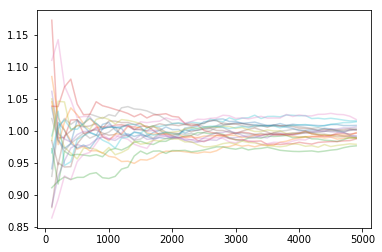

In [85]:
lin = range(100,5000,100)
for _ in range(20):
    tmp = 0
    res = []
    for x in range(1,50):
        tmp += Mont(k,100,2)
        res.append(tmp/x)


    plt.plot(lin, res, alpha = 0.3)
plt.show()
plt.close()
    